In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from functools import reduce
import matplotlib.pyplot as plt
from scipy import stats
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [3]:
path = r"C:\Users\olasunkanmi\Downloads\archive (2).zip"

extracted_file = "data_files"

In [4]:
with ZipFile(path, "r") as f:
    f.extractall("data_files")

In [5]:
data_frames = {}

for file in os.listdir(extracted_file):
    file_path = os.path.join(extracted_file, file)
    data_frames[file] = pd.read_csv(file_path)

In [6]:
for name, df in data_frames.items():
    print(f"{name}")

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


In [7]:
customers = pd.read_csv(r"data_files\olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
print(customers.shape)
print(customers.columns)

(99441, 5)
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state'], dtype='object')


In [9]:
geolocation = pd.read_csv(r"data_files\olist_geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
print(geolocation.shape)
print(geolocation.columns)

(1000163, 5)
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state'], dtype='object')


In [11]:
order_items = pd.read_csv(r"data_files\olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
print(order_items.shape)
print(order_items.columns)

(112650, 7)
Index(['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value'], dtype='object')


In [13]:
order_payment = pd.read_csv(r"data_files\olist_order_payments_dataset.csv")
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [14]:
print(order_payment.columns)
print(order_payment.shape)

Index(['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], dtype='object')
(103886, 5)


In [15]:
order_reviews = pd.read_csv(r"data_files\olist_order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
print(order_reviews.shape)
print(order_reviews.columns)

(99224, 7)
Index(['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], dtype='object')


In [17]:
order_data = pd.read_csv(r"data_files\olist_orders_dataset.csv")
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
print(order_data.shape)
print(order_data.columns)

(99441, 8)
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], dtype='object')


In [19]:
product = pd.read_csv(r"data_files\olist_products_dataset.csv")
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
print(product.shape)
print(product.columns)

(32951, 9)
Index(['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], dtype='object')


In [21]:
sellers = pd.read_csv(r"data_files\olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [22]:
print(sellers.shape)
print(sellers.columns)

(3095, 4)
Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')


In [23]:
product_category = pd.read_csv(r"data_files\product_category_name_translation.csv")
product_category.head() 

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
print(product_category.shape)
print(product_category.columns)

(71, 2)
Index(['product_category_name', 'product_category_name_english'], dtype='object')


In [25]:
for name, df in data_frames.items():
    print(f"{name}: {list(df.columns)}")

olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_order_items_dataset.csv: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_products_dataset.csv: ['product_id', 'product_category_name', 'pro

In [26]:
# Get sets of columns for each file
columns_per_file = {name: set(df.columns) for name, df in data_frames.items()}

# intersection (columns that appear in every file)
common_cols = reduce(set.intersection, columns_per_file.values())
print("Common columns across all CSVs:", common_cols)

Common columns across all CSVs: set()


**MERGING DATASET AND WHY THEY SHOULD BE MERGED**
1. **Customers <-> Orders**

* **Key:** `customer_id`

* **Why:** Orders are made by customers. You can attach customer info (city, state, etc) to each order.

Merge: `order_data` <-> `customers`


2. **Orders <-> Order Items**

* **Keys:** `order_id`

* **Why:** Each order has one or more items. This links orders to products and sellers.

Merge: `order_data` <-> `order_items`


3. **Order Items <-> Products**

* **Key:** `product_id`

Merge: `order_items` <-> `product`


4. **Products <-> Product Category Translation**

* **Key:** `product_category_name`

* **Why:** Product categories are in Portuguese, and this dataset provides English translation.


5. **Order Items <-> Sellers**

* **Key:** `seller_id`

* **Why:** Each item is sold by a seller. This lets you connect sellers'locations to orders.


6. **Orders <-> Payments**

* **Key:** `order_id`

* **Why:** Every order has a payment record (method, value, installments).

Merge: `order_data` <-> `order_payment`


7. **Orders <-> Revviews**

* **Key:** `order_id`

* **Why:** Customers leave reviews for orders (scores, comments)

Merge: `order_id` <-> `order_reviews`


8. **Customers <-> Geolocation**

* **Key:** `zip_code_prefix` (`customer_zip_code_prefix` vs `geolocation_zip_code_prefix`)

* **Why:** To attach latitude/longitude and city/state to customers.
Note: Multiple geolocations can share the same ZIP prefix -> requires aggregation or nearest match.

Merge: `customers` <-> `geolocation`

In [27]:
# 1. Customers + Orders
orders_customers = pd.merge(order_data, customers, on = "customer_id", how = "inner")
orders_customers.head()
print(orders_customers.shape)

(99441, 12)


In [28]:
# 2. Orders + Payments
orders_payments = pd.merge(orders_customers, order_payment, on = "order_id", how = "left")
orders_payments.head()
print(orders_payments.shape)

(103887, 16)


In [29]:
# 3. Orders + Reviews
orders_reviews = pd.merge(orders_payments, order_reviews, on = "order_id", how = "left")
orders_reviews.head()
print(orders_reviews.shape)

(104478, 22)


In [30]:
# 4. Orders + Order Items
orders_items = pd.merge(orders_reviews, order_items, on = "order_id", how = "left")
orders_items.head()
print(orders_items.shape)

(119143, 28)


In [31]:
# 5. Order Items + Products
orders_products = pd.merge(orders_items, product, on = "product_id", how = "left")
orders_products.head() 
print(orders_products.shape)

(119143, 36)


In [32]:
# 6. Products + Product Category Translation
orders_products = pd.merge(orders_products, product_category, on = "product_category_name", how = "left")
orders_products.head()
print(orders_products.shape)

(119143, 37)


In [33]:
# 7. Order Items + Sellers
orders_sellers = pd.merge(orders_products, sellers, on = "seller_id", how = "left")
orders_sellers.head()
print(orders_sellers.shape)

(119143, 40)


In [34]:
# 8. Customers + Geolocation (via zip prefix)
# Note: many geolocations per ZIP, so we take first occurence per prefix
geo_unique = geolocation.groupby("geolocation_zip_code_prefix").first().reset_index()

final_df = pd.merge(orders_sellers, geo_unique, left_on = "customer_zip_code_prefix", right_on = "geolocation_zip_code_prefix", how = "left")
print(final_df.shape)
final_df.head()

(119143, 45)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP,47813.0,-12.169860,-44.988369,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO


##### **PROBABILITY**

____________________
____________________
1. Probability of an Event

Concept: Basic probability = Favorable outcomes / Total outcomes.

Question: What is the probability that a randomly chosen order received a 5-star review?

In [35]:
# We will be using the order_review data to answer this question

orders_reviews.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [36]:
# Probability of 5-star review
# Out of all orders, what is the probability that a review has a 5-star rating?
# This tells us how likely a customer is to give the maximum satisfaction score.

# p(5star) = number of 5-stars review/total reviews

total_reviews = len(order_reviews)

favourable = (order_reviews["review_score"] == 5).sum()

p_5star = favourable/total_reviews

print(f"probability of 5 stars = {round(p_5star * 100, 2)}%")

probability of 5 stars = 57.78%


**Interpretation of result**

Approximately 58% of customers give 5 stars. This is the baseline "success" probability of excellent reviews.

___________________________
________________________________

2. Complementary Probability

Concept:
P(A complement) = 1-P(A)

Question: What is the probability that a review is not 5 stars?

In [37]:
# If we know the probability of 5 stars, what's the probability of not getting a 5-star review?
# This means any rating from 1 to 4.

# We are still going to use the review dataset
# Formula style
p_not5 = (order_reviews["review_score"] != 5).sum() / len(order_reviews)

print(f"P(Review ≠ 5 stars) = {round(p_not5 * 100, 2)}%") 

P(Review ≠ 5 stars) = 42.22%


**Interpretation**

Approximately 42% of reviews are less than perfect. This highlights that not everyone is fully satisfied with product purchased.

___________
____

3. Joint Probability

Concept: P(A∩B)

Question: What is the probability that an order was paid by credit card and received a 5-star review?

In [38]:
# This gives the likelihood of two events happening together.

# Here we will be using the orders_payments and orders_reviews. And we have merged them already.
# Lets merge orders_payments and order_reviews.

order_reviews.head(2)

orders_payment_reviews = pd.merge(orders_reviews, orders_payments, on = "order_id", how = "left")
orders_payment_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [39]:
orders_payment_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x', 'order_delivered_carrier_date_x', 'order_delivered_customer_date_x', 'order_estimated_delivery_date_x', 'customer_unique_id_x', 'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x', 'payment_sequential_x', 'payment_type_x', 'payment_installments_x', 'payment_value_x', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id_y', 'order_status_y', 'order_purchase_timestamp_y', 'order_approved_at_y', 'order_delivered_carrier_date_y', 'order_delivered_customer_date_y', 'order_estimated_delivery_date_y', 'customer_unique_id_y', 'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y', 'payment_sequential_y', 'payment_type_y', 'payment_installments_y', 'payment_value_y'], dtype='object')

In [44]:
total_orders = len(orders_payment_reviews)
favourable_joint = ((orders_payment_reviews["payment_type_y"] == "credit_card") & 
                    (orders_payment_reviews["review_score"] == 5)).sum()

p_joint = favourable_joint / total_orders

print(f"P(Credit Card ∩ 5 stars) = {round(p_joint *100, 2)}%")

P(Credit Card ∩ 5 stars) = 37.51%


**Interpretation**

Approximately 38% of all orders are both paid by credit card and get a perfect review.

______
________

4. Conditional Probability

Concept:

`𝑃(𝐴∣𝐵)=𝑃(𝐴∩𝐵)/𝑃(𝐵)` 
                
`𝑃(𝐴∣𝐵)= Favourable_outcomes / Total_credit_card_outcomes`



Question: What is the probability that a review is 5 stars given that the payment was made by credit card?

In [47]:
# If we already know the payment method was credit card, what is the probability that the review is 5 stars?
# This measures satisfaction among credit card users only.
# We are solving for independent conditional probability.

# We might took few steps, and solve beyond the question for proper understanding
# That is, P(5 stars∣payment method = X)

#𝑃(5∣credit_card)
#P(5∣voucher)
#P(5∣boleto)
# Each is a separate conditional distribution. They are not mutually exclusive outcomes of the same experiment.

favourable_cond = ((orders_payment_reviews["payment_type_y"] == "credit_card") &
                   (orders_payment_reviews["review_score"] == 5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"] == "credit_card").sum()

p_cond = favourable_cond / total_credit

print(f"P(5 stars | Credit Card) = {round(p_cond * 100, 2)}%")


favourable_cond = ((orders_payment_reviews["payment_type_y"] == "voucher") &
                   (orders_payment_reviews["review_score"] == 5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"] == "voucher").sum()

p_cond = favourable_cond / total_credit

print(f"P(5 stars | voucher) = {round(p_cond * 100, 2)}%")


favourable_cond = ((orders_payment_reviews["payment_type_y"] == "boleto") &
                   (orders_payment_reviews["review_score"] == 5)).sum()

total_credit = (orders_payment_reviews["payment_type_y"] == "boleto").sum()

p_cond = favourable_cond / total_credit

print(f"P(5 stars | boleto) = {round(p_cond * 100, 2)}%")

P(5 stars | Credit Card) = 57.39%
P(5 stars | voucher) = 55.71%
P(5 stars | boleto) = 56.95%


**Interpretation**

Each one is around 55-57%, meaning in every payment method, about half of customers gave 5 stars.

________
___________

5. Baye's Rule

Concept:

`P(A|B) = P(B|A).P(A) / P(B)`

A = payment

B = review = 5

`P(payment | review = 5) = P(review = 5 | payment).P(payment) / P(review = 5)`



Question: Given that an order received a 5-star review, what is the probability that it was paid with each payment method (credit_card, boleto, voucher)?


Among only the 5-star reviews, how are payment methods distributed?

In [51]:
# Among orders that got a 5-star review, what fraction used each payment method (credit_card, boleto, voucher, etc.)?
# That is, if we look at only 5-star reviews,  how are they split across payment types?

# Total number of 5-star reviews (denominator for all)
total_5star = (orders_payment_reviews["review_score"] == 5).sum()


# ------P(payment = credit_card | review = 5)  -------
favourable_cond = ((orders_payment_reviews["payment_type_y"] == "credit_card") & (orders_payment_reviews["review_score"] == 5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Credit Card | 5 stars) = {round(p_cond * 100, 2)}%")


# -----P(payment = voucher | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"] == "voucher") & (orders_payment_reviews["review_score"] == 5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Voucher | 5 stars) = {round(p_cond * 100, 2)}%")


# -----P(payment = boleto | review = 5) -----
favourable_cond = ((orders_payment_reviews["payment_type_y"] == "boleto") & (orders_payment_reviews["review_score"] == 5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Boleto | 5 stars) = {round(p_cond * 100, 2)}%")


# ---- P(payment = debit_card | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"] == "debit_card") & (orders_payment_reviews["review_score"] == 5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Debit Card | 5 stars) = {round(p_cond * 100, 2)}%")


# ----- P(payment = others | review = 5) ----
favourable_cond = ((orders_payment_reviews["payment_type_y"] == "others") & (orders_payment_reviews["review_score"] == 5)).sum()

p_cond = favourable_cond / total_5star
print(f"P(Others | 5 stars) = {round(p_cond * 100, 2)}%")

P(Credit Card | 5 stars) = 65.74%
P(Voucher | 5 stars) = 16.9%
P(Boleto | 5 stars) = 16.05%
P(Debit Card | 5 stars) = 1.31%
P(Others | 5 stars) = 0.0%


**Interpretation**

1. `P(Credit Card | 5 stars)` = Among all 5-star reviews, what fraction used credit card? Among 5-star reviews, `65.74%` used credit card

2. `P(Voucher | 5 stars)` = Among all 5-star reviews, what fraction used voucher? Among 5-star reviews, `16.9%` used boleto.

3. `P(Boleto | 5 stars)` = Among all 5-star reviews, what fraction used boleto? `16.05%` of 5-star reviews uses Boleto payment method.

Unlike P(5 | payment)- conditional probability , these will sum to approximately 100% across all payment methods, because every 5-star order must fall into exactly one payment category.

**I hope the interpretation or difference is clear enough, if not, please, go through it again**

### **Expectation and Variance**

**Expectation**
- This is what you would expect from an experiment if you repeat an experiment many times. In practice this means taking the average of the outcome of an experiment, the resulting value is the expectation. In statitics speak, we are talking about the mean(the centre of the distribution).
- So we talk about the baseline performance, the are actually talking about expectation.
- Examples of performance are average delivery time, average customer spend, average rating
- We use it to find out;
 - How long a customer typically wait to get his or her delivery?
 - What is the expected revenue per order?
 - What is the overall satisfaction level?
 - What is the expected sale per seller?

**Variance**
- This explain how far the result of an experiment is from what is expected. When this value is very high, we would conclude that outcome of the experiment is not consistent, it is not predictable, it is unstable. When the value is low, it speaks of predictability, consistency, and stability. In summary, the wider the spread the higher the risk, the narrower the spread the lower the risk and reliability.
- Note that variannce is more interpretable when it is converted to standard deviation(Same unit as your data)

**Usecase**
- The combination of these two are use for risk assessment
- They are also used for measuring reliability - how consistent are deliveries, ratings, or payments?
- They are also use to make data driven decision - To choose sellers, couriers, products with stable perfomance not just high averages.
- Uncertainty estimation (used in confidence intervals and hypothesis testing)
- Machine Learning (feature scaling and PCA rely on mean & variance)

- **Lets see some examples**
   - Mean delivery time = 10 days, SD = 2 days
     - Meaning that “Most customers get deliveries between 8–12 days. Service is predictable.”

   - Mean delivery time = 10 days, SD = 6 days
     - Meaning that “Some customers get deliveries in 4 days, others in 16. Unreliable service.”

   - Mean review score = 4.2, SD = 0.5
     - “Almost everyone gives between 4–5 stars. Strong and consistent reputation.”

   - Mean review score = 4.2, SD = 0.8
     - “Some give 5, others 3. The average hides mixed experiences.”

**Question1**

What is the average delivery time (expectation) and variance (spread/consistency) of deliveries?

In [49]:
orders_payment_reviews.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2.0,voucher,1.0,18.59
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00


In [52]:
# First convert the datetime columns to pandas datetime

# Convert to datetime
orders_payment_reviews["order_purchase_timestamp_x"] = pd.to_datetime(orders_payment_reviews["order_purchase_timestamp_x"])
orders_payment_reviews["order_delivered_customer_date_x"] = pd.to_datetime(orders_payment_reviews["order_delivered_customer_date_x"])

# Calculate delivery time in days
orders_payment_reviews["delivery_time_days"] = (orders_payment_reviews["order_delivered_customer_date_x"] - orders_payment_reviews["order_purchase_timestamp_x"]).dt.days

# Drop missing values
delivery_times = orders_payment_reviews["delivery_time_days"].dropna()

# Lets get the expectation (mean)
mean_delivery = delivery_times.mean()

# Variance & Standard Deviation
variance_delivery = delivery_times.var()
std_delivery = delivery_times.std()

print("Expected delivery time (Mean):", round(mean_delivery, 2), "days")
print("Variance of delivery time:", round(variance_delivery, 2))
print("Standard Deviation of delivery time:", round(std_delivery, 2), "days")


Expected delivery time (Mean): 12.13 days
Variance of delivery time: 89.28
Standard Deviation of delivery time: 9.45 days


**Interpretation**

**Question 2**

What is the expected customer review score and how much do reviews vary?

In [55]:
# Expectation (Mean review score)
mean_review = orders_payment_reviews["review_score"].mean()

# Variance & Standard Deviation
variance_review = orders_payment_reviews["review_score"].var()
std_review = orders_payment_reviews["review_score"].std()

print("Expected review score (Mean):", round(mean_review, 2))
print("Variance of review score:", round(variance_review, 2))
print("Standard Deviation of review score:", round(std_review, 2))

Expected review score (Mean): 4.06
Variance of review score: 1.88
Standard Deviation of review score: 1.37


**Interpretation**

The mean review score shows the overall satisfaction (e.g., ~4 stars = mostly happy customers). The std tells us that most customers give between 3 and 5 stars. If Std was very high (e.g., 2), it would mean customers are divided (some give 1, others give 5). But here, the service reputation is fairly consistent.

**Sampling & Estimation**

Random sampling means selecting a subset of your data without bias so that it fairly represents the whole population.

In business terms, imagine you can’t survey all customers. Instead, you ask a random group and use their responses to estimate the overall trend.

- Lets see how we can work with this in our dataset

In [56]:
orders_payment_reviews.head(2)

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,8.0


In [57]:
# Population mean (true mean from entire dataset)
pop_mean_payment = orders_payment_reviews["payment_value_y"].mean()

# Lets take a random sample of 50 orders
sample_50 = orders_payment_reviews["payment_value_y"].sample(50, random_state=42)
sample_mean_50 = sample_50.mean()

# Take a random sample of 200 orders
sample_200 = orders_payment_reviews["payment_value_y"].sample(200, random_state=42)
sample_mean_200 = sample_200.mean()

print("Population mean payment value:", round(pop_mean_payment, 2))
print("Sample mean (n=50):", round(sample_mean_50, 2))
print("Sample mean (n=200):", round(sample_mean_200, 2))

Population mean payment value: 135.83
Sample mean (n=50): 111.91
Sample mean (n=200): 135.99


**Interpretation**

- Population mean = “the real average spending across all customers.”

- Sample mean (50 orders) may be off (underestimate or overestimate).

- Sample mean (200 orders) should be closer to the population mean.

This shows that why random sampling is powerful we can get a good estimate of the population without looking at every order.

**Law of Large Numbers (LLN)**

You might wonder why big data is a reliable estimate, the idea behind it is the law of large numbers. Imagine you are asking people are the nature of the AI fellowship, the more people you ask, the more likely to build up your expectation or mindset about what the quality of the fellowship.

- The Law of Large Numbers says,

"As the sample size increases, the sample mean → converges to the true population mean"

- Let us experiment a bit...

In [58]:
import numpy as np

# Draw increasing sample sizes and track their means
sample_sizes = [10, 50, 100, 500, 1000, 5000]
sample_means = []


for n in sample_sizes:
    sample = orders_payment_reviews["payment_value_y"].sample(n, random_state=234)
    sample_means.append(sample.mean())
    
    
    # Show results
    for n, mean in zip(sample_sizes, sample_means):
        print(f"Sample size = {n}, Sample mean = {round(mean, 2)}")
        
        
    print("Population mean (true):", round(pop_mean_payment, 2))

Sample size = 10, Sample mean = 101.01
Population mean (true): 135.83
Sample size = 10, Sample mean = 101.01
Sample size = 50, Sample mean = 89.77
Population mean (true): 135.83
Sample size = 10, Sample mean = 101.01
Sample size = 50, Sample mean = 89.77
Sample size = 100, Sample mean = 105.9
Population mean (true): 135.83
Sample size = 10, Sample mean = 101.01
Sample size = 50, Sample mean = 89.77
Sample size = 100, Sample mean = 105.9
Sample size = 500, Sample mean = 138.0
Population mean (true): 135.83
Sample size = 10, Sample mean = 101.01
Sample size = 50, Sample mean = 89.77
Sample size = 100, Sample mean = 105.9
Sample size = 500, Sample mean = 138.0
Sample size = 1000, Sample mean = 137.0
Population mean (true): 135.83
Sample size = 10, Sample mean = 101.01
Sample size = 50, Sample mean = 89.77
Sample size = 100, Sample mean = 105.9
Sample size = 500, Sample mean = 138.0
Sample size = 1000, Sample mean = 137.0
Sample size = 5000, Sample mean = 134.04
Population mean (true): 135

**Interpretation**

The result above should expplain the reliability of big data, right?

With 10 samples, the mean may jump around (unreliable).Ad with 1000+ samples the  mean is almost the same as population mean.

**Central Limit Theorem (CLT)**

In [59]:
orders_payment_reviews.head(2)

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id_x,customer_zip_code_prefix_x,customer_city_x,customer_state_x,payment_sequential_x,payment_type_x,payment_installments_x,payment_value_x,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id_y,order_status_y,order_purchase_timestamp_y,order_approved_at_y,order_delivered_carrier_date_y,order_delivered_customer_date_y,order_estimated_delivery_date_y,customer_unique_id_y,customer_zip_code_prefix_y,customer_city_y,customer_state_y,payment_sequential_y,payment_type_y,payment_installments_y,payment_value_y,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3.0,voucher,1.0,2.00,8.0


In [60]:
orders_payment_reviews.columns

Index(['order_id', 'customer_id_x', 'order_status_x', 'order_purchase_timestamp_x', 'order_approved_at_x', 'order_delivered_carrier_date_x', 'order_delivered_customer_date_x', 'order_estimated_delivery_date_x', 'customer_unique_id_x', 'customer_zip_code_prefix_x', 'customer_city_x', 'customer_state_x', 'payment_sequential_x', 'payment_type_x', 'payment_installments_x', 'payment_value_x', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'customer_id_y', 'order_status_y', 'order_purchase_timestamp_y', 'order_approved_at_y', 'order_delivered_carrier_date_y', 'order_delivered_customer_date_y', 'order_estimated_delivery_date_y', 'customer_unique_id_y', 'customer_zip_code_prefix_y', 'customer_city_y', 'customer_state_y', 'payment_sequential_y', 'payment_type_y', 'payment_installments_y', 'payment_value_y', 'delivery_time_days'], dtype='object')

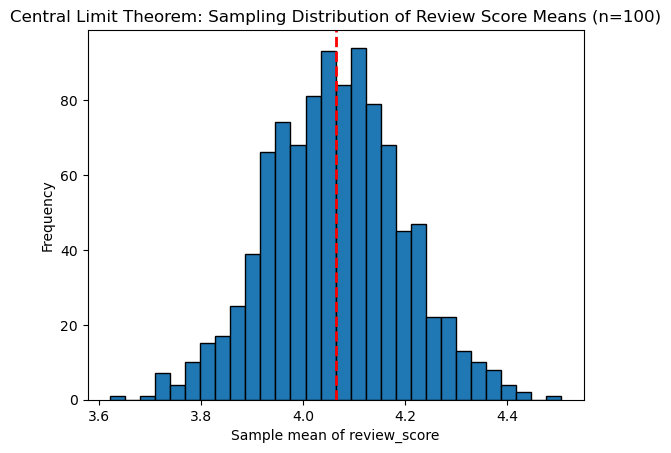

In [63]:
# Lets collect 100 samples of review_scores, take the mean. Repeat the same process a thousand times.
# Then take all the 1000 means use it to plot a histogram and lets see what the shape or distribution would look like.

# Collect many sample means
sample_means = []
for i in range(1000):           # repeat 1000 times
    sample = orders_payment_reviews["review_score"].sample(100, replace=True)
    sample_means.append(sample.mean())
    
    
# Plot the sampling distribution of the mean
plt.hist(sample_means, bins=30, edgecolor="black")
plt.axvline(np.mean(sample_means), color="red", linestyle="dashed", linewidth=2)
plt.title("Central Limit Theorem: Sampling Distribution of Review Score Means (n=100)")
plt.xlabel("Sample mean of review_score")
plt.ylabel("Frequency")
plt.show()

**The Central Limit Theorem says**, *"If we take many random samples and calculate their means the distribution of those means will look like a normal distribution (bell curve), even if the original data is not normal."*

It allows us to use normal distribution tools (confidence intervals, hypothesis testing) in Data Science.

Now from our plot, Even though review_score is discrete (1–5 stars) and not perfectly normal the distribution of sample means (averages of samples) will look like a bell curve.

This explains why in Data Science we confidently apply normal-based methods (t-tests, regression assumptions, confidence intervals).

**One-Sample Test**

**A hypothesis** is just an assumption or claim about a population (the “big picture data”) that we want to test using a sample (the data we actually have).

- Let think of it like this;

 - It is like asking, “Does this medicine work?”

 - “Do credit card users spend more than boleto users?”

 - “Are customers happier than neutral (score 3)?”

Two be able to answer this question, we have to "**set up two competing statements**"

- **The first statement is called H0 (pronounced as H-not) or called the Null Hypothesis**
    - You can see it as the boring assumption.
    - It says, "Nothing special is happening, things are the same, things are neutral, the assumption is null"
    - This assumption is usually viewed as TRUE!
    - Because of this, we really need to conduct a test, this test is called the test of hypothesis. 
    - IF the evidence from the test is strong enough, then we have to `reject H0`
    - We know that this evidence is  not strong enough if the p-value is greater that the experiment score.

**The second statement is called H₁ (pronounced as H-one) or called the Alternative Hypothesis**

 - You can see it as the interesting assumption.
 - It argues, “Something different is happening, things are not the same, things are not neutral.”
 - This is the claim we actually want to investigate.
 - If the evidence from the test is strong enough, then we reject H₀ and say H₁ is more likely true.

For example:

`If H₀ says “average review score = 3 (neutral)”`

`then H₁ argues “average review score ≠ 3 (not neutral).”`
- we will investigate H₁ to check.

`If H₀ says “credit card spend = boleto spend”`,
 
`then H₁ argues“credit card spend ≠ boleto spend.”`

So having understand the concept of hypthesis testing, let go back to **A one-sample test.** It is used when we want to check if the average (mean) of our sample data is different from some reference value (what we expect, or a “neutral” baseline).

`H₀ (Null Hypothesis)- Says the sample mean is equal to the reference value`

`H₁ (Alternative Hypothesis) - Says the sample mean is different from the reference value.`

- **Lets try setting up an hypothesis now...**

Suppose we want to test if customers are happier than neutral.

In our Olist data, the review_score ranges from 1–5. Neutral is 3. We want to test, “Is the average review score different from 3?”

**Step 1 – Set up hypotheses**

`H₀: Average review score = 3 (customers are neutral)`

`H₁: Average review score ≠ 3 (customers are not neutral, they are either happier or unhappier)`

**Step 2 – Why test it?**

- If H₀ is true, Olist has “just okay” service.

- If H₁ is true, Customers are clearly happy (if mean > 3) or unhappy (if mean < 3).

**Question1**

In the Olist e-commerce dataset, customer reviews are scored from 1 (worst) to 5 (best). A score of 3 is considered neutral.
Using the review data, test whether the average customer review score is significantly different from 3 (neutral).

In [65]:
# We have one sample, that is the set of all customer review scores.

#We are comparing its mean against a benchmark/reference value = 3.

# Now, the question is essentially, "Are Olist customers, on average, happier than neutral (3)?"

# Lets write the hypothesis

# H₀ (Null Hypothesis): The average review score is equal to 3
# H₁ (Alternative Hypothesis): The average review score is not equal to 3


# Extract review scores
review_scores = order_reviews["review_score"].dropna()

# Define the "neutral" benchmark
neutral_score = 3

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(review_scores, popmean=neutral_score)

print("Mean review score:", round(review_scores.mean(), 2))
print("T-statistics:", round(t_stat, 3))
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject H0: The average review score is significantly different from 3 (neutral).")
else:
    print("Fail to reject H0: The data does not provide enough evidence that the average review differs from 3.")

Mean review score: 4.09
T-statistics: 253.952
P-value: 0.0
Reject H0: The average review score is significantly different from 3 (neutral).


**Interpretation**

The p-value is ~0, way below 0.05 (strong evidence)

So we conclude that the customers are significantly happier than neutral.

**Two-Sample t-test**

A two-sample t-test is a statistical test used to compare the average (mean) of two independent groups to see if they are significantly different from each other.

It answers the question, “Do two groups have the same average, or are their averages different?”

Null and Alternative Hypotheses (General Form)

H₀ (Null Hypothesis)- The two group means are equal.

`𝜇1=𝜇2`​

H₁ (Alternative Hypothesis)- The two group means are not equal.

`𝜇1≠𝜇2`

lets illustrate it this way...
Two groups - The test always involves two separate groups of data or categories.

Example: Men vs Women, Credit Card vs Boleto, Group A vs Group B.

To compute, We are not looking at individual values, but the overall group average.

But first, the groups have to be unrelated(independent samples) e.g, one customer can't belong to both payment methods at the same time.

How do we interprete the result,

- If the `p-value < 0.05` means the difference in means is significant.

- If `p-value ≥ 0.05` means the difference could just be due to chance.

**Lets have some illustrations here**

Just imagine that  your are the manager of Olist e-commerce platform. And you wish to know customers'payment preference from a data driven approach.

Yea? So you ask the question,"Do customers who pay with credit card spend more money than those who pay with Boleto(Bank slip)?"

 - Group1 - Customers who use Credit Card
 - Group2 - Customers who use Boleto

Variable we care about - payment_value


**Lets define our Hypothesis**

H₀ (Null Hypothesis) - On average, Credit Card users and Boleto users spend the same amount.


`𝜇(credit) = 𝜇(boleto)`
​

H₁ (Alternative Hypothesis):
"On average, Credit Card users spend differently than Boleto users."

`𝜇(credit) ≠ 𝜇(boleto)`


But, wait o, why can’t we just compare the averages directly?

The answer is because differences could happen by chance,  maybe we sampled just a few expensive orders on Credit Card. so the t-test helps us check if the difference is statistically significant (real) or just random noise.

**Question1**

- Extract the payment_value for orders paid with Credit Card and Boleto.

  - Perform a two-sample t-test and interpret the results

     - What are the average spends for each group?

     - What is the p-value?

     - Based on the p-value, do we reject or fail to reject the null hypothesis?

     - What does this mean in practical terms about customer spending behavior?

In [66]:
# Lets craft the hypothesis
# H₀ (Null Hypothesis) -  The average payment_value of Credit Card orders is equal to the average payment_value of Boleto orders

# H₁ (Alternative Hypothesis) - The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.

In [67]:
# Filter payment values by payment type
credit_card = orders_payment_reviews.loc[
    orders_payment_reviews["payment_type_y"] == "credit_card", "payment_value_y"
]

boleto = orders_payment_reviews.loc[
    orders_payment_reviews["payment_type_y"] == "boleto", "payment_value_y"
]

# Drop missing values - just in case
credit_card = credit_card.dropna()
boleto = boleto.dropna()

print("Credit Card Average Spend:", round(credit_card.mean(), 2))
print("Boleto Average Spend:", round(boleto.mean(), 2))

Credit Card Average Spend: 159.07
Boleto Average Spend: 144.99


In [68]:
# Lets perform our t-test
t_stat, p_value = stats.ttest_ind(credit_card, boleto)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 8.122034075252333
P-value: 4.635550595532722e-16


**Interpretation**

**Case 1**

`p-value < 0.05 (Reject H₀)`

- This means there is a significant difference in spending between Credit Card and Boleto customers.

**Case 2**
`p-value ≥ 0.05 (Fail to Reject H₀)`

- This means we do not have enough evidence to say the spending is different.

In [ ]:
T_statistic = 8.12

p_value = 4.63 * 10**-16      #(which is basically 0.000000000000000463)

# Lets compare the values using p-value with significance level (α = 0.05)

if p_value < 0.05:
    print("Reject H0: The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.")
else:
    print("Fail to reject H0: The data does not provide enough evidence that the average payment_value of Credit Card orders differs from the average payment_value of Boleto orders.")

Reject H0: The average payment_value of Credit Card orders is different from the average payment_value of Boleto orders.


H₀ said that Credit Card users spend the same on average as Boleto users.

H₁ argued that Credit Card users spend differently than Boleto users.

From our test, t-test showed  that the difference is statistically significant (It is very unlikely to  be a random chance).

**Lets take our interpretation further**

Customers who pay with Credit Card spend significantly more on average than those who pay with Boleto.

So this insight can help Olist to;

1. Prioritize Credit Card payment promotions, since those customers bring more revenue.

2. Investigate why Boleto customers spend less, maybe boleto is used for smaller, lower-value purchases.